In [10]:
import matplotlib.pyplot as plt
import numpy as np
import json
import ccf_streamlines.projection_removed_singlets as ccfproj
import os
import pandas as pd
import ccf_streamlines.morphology as ccfmorph
import seaborn as sns
import time

with open("avg_layer_depths.json", "r") as f:
    layer_tops = json.load(f)

layer_thicknesses = {
        'Isocortex layer 1': layer_tops['2/3'],
        'Isocortex layer 2/3': layer_tops['4'] - layer_tops['2/3'],
        'Isocortex layer 4': layer_tops['5'] - layer_tops['4'],
        'Isocortex layer 5': layer_tops['6a'] - layer_tops['5'],
        'Isocortex layer 6a': layer_tops['6b'] - layer_tops['6a'],
        'Isocortex layer 6b': layer_tops['wm'] - layer_tops['6b'],
}
bf_boundary_finder = ccfproj.BoundaryFinder(
    projected_atlas_file="flatmap_butterfly.nrrd",
    labels_file="labelDescription_ITKSNAPColor.txt",
)

#We get the left hemisphere region boundaries with the default arguments
bf_left_boundaries = bf_boundary_finder.region_boundaries()

# And we can get the right hemisphere boundaries that match up with
# our projection if we specify the same configuration
bf_right_boundaries = bf_boundary_finder.region_boundaries(
    # we want the right hemisphere boundaries, but located in the right place
    # to plot both hemispheres at the same time
    hemisphere='right_for_both',

    # we also want the hemispheres to be adjacent
    view_space_for_other_hemisphere='flatmap_butterfly',
)
ccf_coord_proj = ccfproj.IsocortexCoordinateProjector(
    projection_file="flatmap_butterfly.h5",
    surface_paths_file="surface_paths_10_v3.h5",
    closest_surface_voxel_reference_file="closest_surface_voxel_lookup.h5",
    layer_thicknesses=layer_thicknesses,
    streamline_layer_thickness_file="cortical_layers_10_v2.h5",
)

neuron_df=pd.read_csv('registered_filt_neurons.csv')
neuron_df_filtered =neuron_df[(neuron_df['x_CCF'] <=528) & (neuron_df['y_CCF'] <=320) & (neuron_df['z_CCF'] <=456) & (neuron_df['x_CCF']>=0)& (neuron_df['y_CCF']>=0)& (neuron_df['z_CCF']>=0) ].copy()
neuron_df_filtered['x_ccf_rescale']=neuron_df_filtered['x_CCF']*25
neuron_df_filtered['y_ccf_rescale']=neuron_df_filtered['y_CCF']*25
neuron_df_filtered['z_ccf_rescale']=neuron_df_filtered['z_CCF']*25

n = 100  #chunk row size
list_df = [neuron_df_filtered[i:i+n] for i in range(0,neuron_df_filtered.shape[0],n)]
list_df = np.array_split(neuron_df_filtered, n)
col=neuron_df_filtered.columns.tolist()+['streamline_dim1','streamline_dim2','streamline_dim3','streamline']
neuron_filtered_streamline_df=pd.DataFrame(columns=col)
for i in range(len(list_df)):
    df=list_df[i]
    coor=df[['x_ccf_rescale','y_ccf_rescale','z_ccf_rescale']].values
    try:
        all_coords_slab = ccf_coord_proj.project_coordinates(
        coor,
        thickness_type='normalized_full',
        drop_voxels_outside_view_streamlines=True,
        view_space_for_other_hemisphere='flatmap_butterfly',)
        df['streamline_dim1']=[i[0] for i in all_coords_slab]
        df['streamline_dim2']=[i[1] for i in all_coords_slab]
        df['streamline_dim3']=[i[2] for i in all_coords_slab]
        df['streamline']='good'
    except:
        df['streamline_dim1']=np.nan
        df['streamline_dim2']=np.nan
        df['streamline_dim3']=np.nan
        df['streamline']='bad'
   
    frames =[neuron_filtered_streamline_df,df]
    neuron_filtered_streamline_df=pd.concat(frames)

neuron_filtered_streamline_df_1=neuron_filtered_streamline_df[['id','streamline_dim1','streamline_dim2','streamline_dim3']].copy()
neuron_df_all=neuron_df.merge(neuron_filtered_streamline_df_1,how='left',on='id')
neuron_df_all.to_csv('streamline_registered_filt_neurons.csv',index=False)

loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 565.23it/s]

loading path information



100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 649.92it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 209.18it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 206.14it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 588.03it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 587.22it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 180.21it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 172.28it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 195.29it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 211.96it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 684.21it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 722.23it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 212.33it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 209.44it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 151.43it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 154.76it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 274.28it/s]
E:\Anaconda3\envs\ccf_streamline\Lib\site-packages\ccf_streamlines\linestring3d.py:117: RuntimeWarning: invalid value encountered in divide
  path_vec = path_vec / np.linalg.norm(path_vec)


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 287.18it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 230.46it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 226.84it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 163.72it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 162.62it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 265.25it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 281.08it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 238.18it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 235.29it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 237.81it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 253.66it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 217.95it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 242.33it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 184.38it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 184.58it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 349.10it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 349.61it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 253.07it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 258.65it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 226.69it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 219.99it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 371.43it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 393.89it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 259.31it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 247.24it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 216.67it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 235.26it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 431.86it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 464.26it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 288.17it/s]
E:\Anaconda3\envs\ccf_streamline\Lib\site-packages\ccf_streamlines\linestring3d.py:117: RuntimeWarning: invalid value encountered in divide
  path_vec = path_vec / np.linalg.norm(path_vec)


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 275.81it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 239.82it/s]
E:\Anaconda3\envs\ccf_streamline\Lib\site-packages\ccf_streamlines\linestring3d.py:117: RuntimeWarning: invalid value encountered in divide
  path_vec = path_vec / np.linalg.norm(path_vec)


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 240.74it/s]


loading path information


100%|████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 1083.24it/s]


loading path information


100%|████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 1181.85it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 260.00it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 270.83it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 391.75it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 370.41it/s]


loading path information


100%|████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 2166.57it/s]


loading path information


100%|████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 1856.90it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 370.30it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 391.18it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 216.67it/s]
E:\Anaconda3\envs\ccf_streamline\Lib\site-packages\ccf_streamlines\linestring3d.py:117: RuntimeWarning: invalid value encountered in divide
  path_vec = path_vec / np.linalg.norm(path_vec)


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 207.05it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 365.41it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 359.89it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 649.39it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 650.03it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 275.45it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 276.59it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 244.63it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 254.30it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 866.63it/s]


loading path information


100%|████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 1299.94it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 999.98it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 990.61it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 158.35it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 185.71it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 324.86it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 346.61it/s]


loading path information


100%|████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 1188.68it/s]


loading path information


100%|████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 1300.00it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 301.98it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 270.83it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 236.11it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 244.54it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 541.67it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 565.18it/s]


loading path information


100%|████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 1290.80it/s]


loading path information


100%|████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 1444.51it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 182.73it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 179.55it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 235.92it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 235.96it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 447.63it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 391.21it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 499.22it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 489.51it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 160.30it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 154.15it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 405.74it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 418.56it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 498.66it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 498.72it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 160.14it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 164.56it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 254.55it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 259.81it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 393.41it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 370.73it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 448.27it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 479.58it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 173.33it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 170.65it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 242.43it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 244.67it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 339.74it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 320.90it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 169.65it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 165.18it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 219.49it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 217.18it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 308.56it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 331.59it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 160.31it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 146.37it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 166.37it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 164.24it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 419.35it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 309.45it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 244.07it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 240.36it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 113.82it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 109.72it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 324.52it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 341.42it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 270.42it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 316.60it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 152.75it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 150.84it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 136.75it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 133.00it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 405.83it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 418.26it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 288.36it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 288.50it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 117.98it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 118.04it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 187.72it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 196.63it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 433.32it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 464.29it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 288.51it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 274.69it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 104.70it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 101.75it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 231.84it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 223.73it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 433.29it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 415.38it/s]


loading path information


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 94.79it/s]


loading path information


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 93.29it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 172.80it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 176.56it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 438.53it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 418.52it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 281.61it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 266.39it/s]


loading path information


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 98.36it/s]


loading path information


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 96.27it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 220.08it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 219.98it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 330.65it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 287.55it/s]


loading path information


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 90.71it/s]


loading path information


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 90.71it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 149.43it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 148.80it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 253.89it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 258.30it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 107.91it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 105.04it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 103.87it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 100.55it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 235.33it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 235.73it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 116.97it/s]
E:\Anaconda3\envs\ccf_streamline\Lib\site-packages\ccf_streamlines\linestring3d.py:117: RuntimeWarning: invalid value encountered in divide
  path_vec = path_vec / np.linalg.norm(path_vec)


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 110.12it/s]


loading path information


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 82.24it/s]


loading path information


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 82.54it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 187.62it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 180.05it/s]


loading path information


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 77.53it/s]


loading path information


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 76.43it/s]


loading path information


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 97.64it/s]


loading path information


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 92.72it/s]


loading path information


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 98.06it/s]


loading path information


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 96.69it/s]


loading path information


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 68.33it/s]


loading path information


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 67.10it/s]


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 121.02it/s]
E:\Anaconda3\envs\ccf_streamline\Lib\site-packages\ccf_streamlines\linestring3d.py:117: RuntimeWarning: invalid value encountered in divide
  path_vec = path_vec / np.linalg.norm(path_vec)


loading path information


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 118.57it/s]


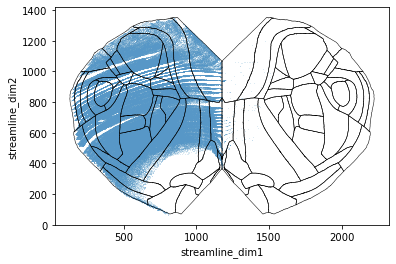

In [13]:

#check to make sure everything is good
plot_df=neuron_df_all[~(neuron_df_all['streamline_dim1'].isna())]
sns.scatterplot(data=plot_df,x='streamline_dim1',y='streamline_dim2',s=0.2)
for k, boundary_coords in bf_left_boundaries.items():
    plt.plot(*boundary_coords.T, c="black", lw=0.5)
for k, boundary_coords in bf_right_boundaries.items():
    plt.plot(*boundary_coords.T, c="black", lw=0.5)